# Reconhecimento de Arco Senil em olhos

Vamos treinar um modelo baseado em MultiLayer Perceptron
 para identificar arco senil

Montar o Drive, para que seja possível acessar o dataset

In [2]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


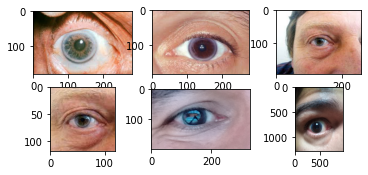

In [18]:
from matplotlib import pyplot 
from matplotlib.image import imread 
folder = '/content/drive/My Drive/ia/ArcoSenilDataset/treino/Senil/' 

for i in range(6):  
    pyplot.subplot(330 + 1 + i)   
    filename = folder+'imagem'+str(i)+'.jpg'  
    image = imread(filename)  
    pyplot.imshow(image) 
pyplot.show()

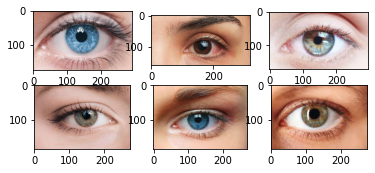

In [37]:
from matplotlib import pyplot 
from matplotlib.image import imread 
folder = '/content/drive/My Drive/ia/ArcoSenilDataset/treino/Normal/' 

for i in range(6):  
    pyplot.subplot(330 + 1 + i)   
    filename = folder+'images'+str(i)+'.jpeg'  
    image = imread(filename)  
    pyplot.imshow(image) 
pyplot.show()

Vamos iterar diretório por diretório e, em seguida, cada imagem nesse diretório - redimensionando-as rapidamente para (128 * 128) e anexar a matriz de pixels de cada imagem X e seu rótulo correspondente y 

In [20]:
import numpy as np
from PIL import Image
import operator
from operator import itemgetter
import os

X = []
y = []
count = 0
dir="/content/drive/My Drive/ia/ArcoSenilDataset/treino/"
for i in os.listdir(dir):
    print(i,":",len(os.listdir(dir+"/"+i)))
    count+=len(os.listdir(dir+"/"+i))
    for j in os.listdir(dir+"/"+i):
        img = Image.open(dir+"/"+i+"/"+j)
        img = img.resize((128,128))
        X.append(np.asarray(img))
        y.append(i)
print(count)
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

Senil : 69
Normal : 54
123
(123, 128, 128, 3) (123,)


Remodelando X (356, 128, 128, 3) para (356, 128 * 128 * 3) :

In [22]:
X = X.reshape(123, 49152).astype('float32')

Normalizando os pixels entre 0 e 1:

In [23]:
X/=255
X.shape

(123, 49152)

Vamos treinar o modelo baseado em Multi
Laye Perceptron

In [24]:
from sklearn.neural_network import MLPClassifier #Importing MLPClassifier for classification. 
#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500)
mlp.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Vamos carregar uma imagem para detectar qual é a celebridade

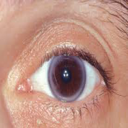

In [27]:
from PIL import Image 
img = Image.open('/content/drive/My Drive/ia/ArcoSenilDataset/treino/Senil/imagem1.jpg') 
img = img.resize((128,128))
img

Vamos transformar a imagem em um array de pixel e redimensionar

In [28]:
new_img = np.asarray(img)
new_img  = new_img .reshape(1, 49152).astype('float32')
new_img

array([[229., 185., 171., ..., 197., 151., 127.]], dtype=float32)

Vamos normalizar

In [29]:
new_img/=255
new_img.shape
new_img


array([[0.8980392 , 0.7254902 , 0.67058825, ..., 0.77254903, 0.5921569 ,
        0.49803922]], dtype=float32)

Vamos predizer qual é a celebridade a partir da imagem 
que foi carregada

In [30]:
prediction = mlp.predict(new_img)
print(prediction)

['Senil']


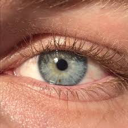

In [32]:
from PIL import Image 
img = Image.open('/content/drive/My Drive/ia/ArcoSenilDataset/treino/Normal/images8.jpeg') 
img = img.resize((128,128))
img

In [33]:
new_img = np.asarray(img)
new_img  = new_img .reshape(1, 49152).astype('float32')
new_img

array([[154.,  96.,  72., ..., 224., 151., 127.]], dtype=float32)

In [34]:
new_img/=255
new_img.shape
new_img

array([[0.6039216 , 0.3764706 , 0.28235295, ..., 0.8784314 , 0.5921569 ,
        0.49803922]], dtype=float32)

In [35]:
prediction = mlp.predict(new_img)
print(prediction)

['Normal']
